In [1]:
from scipy import signal
import os
import pickle
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

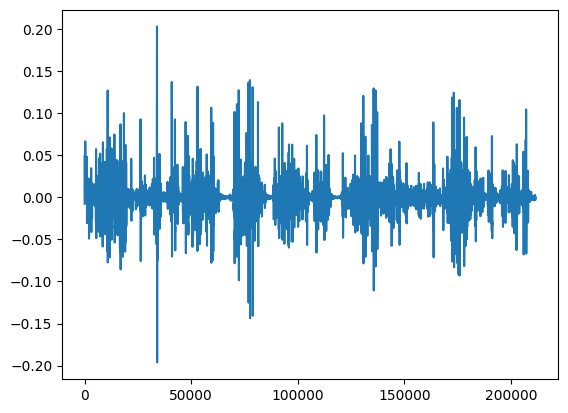

In [36]:
data, fs = librosa.load('Texture_Dataset/G1AluminumMesh/G1RhombAluminumMesh_Sound_Movement_train9.wav', sr=44100)
b, a = signal.butter(3, [20 / fs, 1000 / fs], 'bandpass')
data = signal.filtfilt(b, a, data)
plt.plot(data)
DMatrix = librosa.stft(data, n_fft=2048, hop_length=int(2048 * 0.1), window='hann')
dbMatrix = librosa.amplitude_to_db(np.abs(DMatrix), ref=np.max)

In [60]:
sd.play(data, 44100)

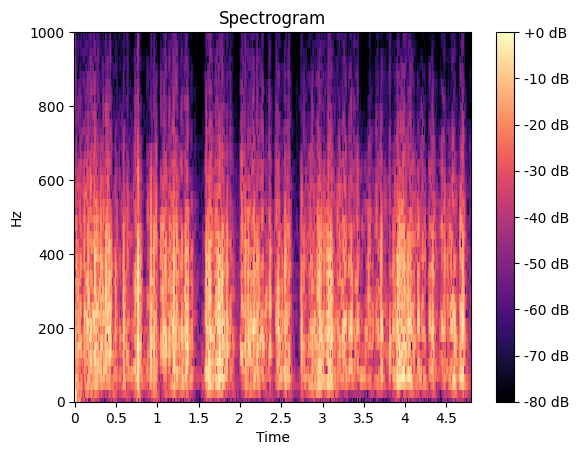

In [37]:
fig, ax = plt.subplots()
img = librosa.display.specshow(dbMatrix, sr=fs, n_fft=2048, hop_length=int(2048 * 0.1), y_axis='linear', x_axis='time', ax=ax)
ax.set_title('Spectrogram')
plt.ylim(0, 1000)
fig.colorbar(img, ax=ax, format="%+2.0f dB")

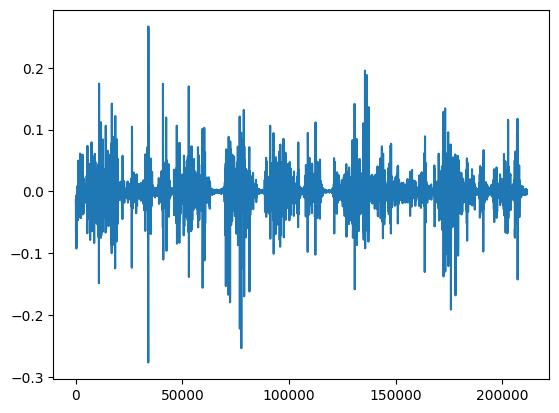

In [39]:
spec = dbMatrix[:48,:]

ex = np.full((1025-(spec.shape[0]), spec.shape[1]),-80)#もとの音声の周波数上限を切っているので配列の大きさを合わせるために-80dbで埋めている
spec = np.append(spec,ex,axis=0)

spec = librosa.db_to_amplitude(spec)
re_wav = librosa.griffinlim(spec,n_iter=100,n_fft=2048, hop_length=int(2048 * 0.1), window='hann')
plt.plot(re_wav*30)

# from sklearn.metrics import mean_absolute_error
# print(mean_absolute_error(re_wav, data[:211548]))

In [57]:
sd.play(re_wav*22, 44100)

(48, 1038)


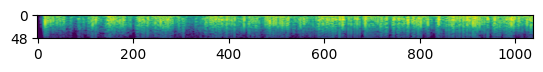

In [13]:
plt.imshow(dbMatrix[:48,:])
plt.yticks([0, 48])
print(np.array(dbMatrix[:48,:]).shape)

In [34]:
def wav2spec(wav_path):
    data, fs = librosa.load(wav_path, sr=44100)
    b, a = signal.butter(3, [20 / fs, 1000 / fs], 'bandpass')
    data = signal.filtfilt(b, a, data)
    DMatrix = librosa.stft(data, n_fft=2048, hop_length=int(2048 * 0.1), window='hann')
    dbMatrix = librosa.amplitude_to_db(np.abs(DMatrix), ref=np.max)

    return dbMatrix[:48,:]

In [35]:
# Small
dataset_path = 'Texture_Dataset'
autoencoder_data = {"spectrogram": [], "texture": [], "filename":[]}

for texture_dir in os.listdir(dataset_path):
    if texture_dir[0] != '.':
        for spectrogram in os.listdir(dataset_path + '/' + texture_dir):
            spec = wav2spec(dataset_path + '/' + texture_dir + '/' + spectrogram)
            samples = np.lib.stride_tricks.sliding_window_view(spec,(48,320))
            samples = samples.squeeze()
            samples = samples[::5,]
            sample_n = samples.shape[0]
            autoencoder_data['spectrogram'].extend(samples)
            autoencoder_data['texture'].extend([texture_dir[:2]] * sample_n)
            autoencoder_data['filename'].extend([spectrogram] * sample_n)

autoencoder_data['spectrogram'] = np.array(autoencoder_data['spectrogram'])
file = open('trainset_7-class.pickle', 'wb')
pickle.dump(autoencoder_data, file)
file.close()


In [36]:
# Large
dataset_path = 'LMT_108_SurfaceMaterials_Database/SoundScans/Movement/Training'
autoencoder_data = {"spectrogram": [], "texture": [], "filename":[]}

num_record = len(os.listdir(dataset_path))
print(num_record)
n = 0

for sound in os.listdir(dataset_path):
    spec = wav2spec(dataset_path + '/' + sound)
    samples = np.lib.stride_tricks.sliding_window_view(spec,(48,320))
    samples = samples.squeeze()
    samples = samples[::20,]
    sample_n = samples.shape[0]
    autoencoder_data['spectrogram'].extend(samples)
    texture_name = sound.split('_')
    texture_name = texture_name[0]
    n += 1
    print(str(n) + '/' + str(num_record) + ', ' + texture_name)
    autoencoder_data['texture'].extend([texture_name] * sample_n)
    autoencoder_data['filename'].extend([sound] * sample_n)

autoencoder_data['spectrogram'] = np.array(autoencoder_data['spectrogram'])
file = open('trainset_LMT_large.pickle', 'wb')
pickle.dump(autoencoder_data, file)
file.close()


1080
1/1080, G8Paper
2/1080, G7CoarseFoam
3/1080, G4WoodTypeSilverOak
4/1080, G2CrushedRock
5/1080, G4Larch
6/1080, G4CoreBeech
7/1080, G8GlitterPaperVersion1
8/1080, G3CeramicTile
9/1080, G7StyrofoamVersion1
10/1080, G7EpdmFoam
11/1080, G1FineAluminumMesh
12/1080, G9RedVelvet
13/1080, G8Cardboard
14/1080, G6IsolatingFoilVersion3
15/1080, G9Leather
16/1080, G5SolidRubberPlateVersion2
17/1080, G9TextileVersion1
18/1080, G7EpdmFoam
19/1080, G6Steelwool
20/1080, G9BlueSatin
21/1080, G6IsolatingFoilVersion2
22/1080, G5RubberPlateVersion2
23/1080, G7CoarseFoam
24/1080, G3EpoxyPlate
25/1080, G4LaminatedWood
26/1080, G6Carpet
27/1080, G8WallpaperVersion2
28/1080, G8WallpaperVersion2
29/1080, G6Carpet
30/1080, G8PlayingCardPaper
31/1080, G3EpoxyPlate
32/1080, G7CoarseFoam
33/1080, G9FloorClothVersion2
34/1080, G9BlueSatin
35/1080, G5RubberPlateVersion2
36/1080, G6IsolatingFoilVersion2
37/1080, G6IsolatingFoilVersion2
38/1080, G9TextileVersion1
39/1080, G7EpdmFoam
40/1080, G5SolidRubberPlateVer

In [39]:
with open('trainset_7-class.pickle', 'rb') as file:
    autoencoder_data = pickle.load(file)

In [40]:
print(len(autoencoder_data['texture']))

14400
